In [1]:
import numpy as np
import pandas as pd

# Plotting library
import matplotlib.pyplot as plt

# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# ML functions
from sklearn.neighbors import KNeighborsRegressor


In [2]:
data = pd.read_csv('data/Absenteeism_at_work_AAA/Absenteeism_at_work.csv',
                   header=0,delimiter=";")
print("Size of the data: ", data.shape)

Size of the data:  (740, 21)


In [3]:
# Convert the pandas to numpy
data = np.array(data)
data_X = data[:,:-1]
data_Y = data[:,-1]
n_feature = data_X.shape[1]
print("number of features: ", n_feature)

# Generate Train/Test data
X_train, X_test, y_train, y_test = train_test_split(
       data_X, data_Y, test_size=0.33, random_state=0)

number of features:  20


In [4]:
# Let's do some normalization
scaler = preprocessing.StandardScaler().fit(X_train)
# The same scaling 'object' applied to both train/test data
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [5]:
# k_NN model
k_nn_list = [3, 6, 9, 12, 16, 24, 36]
err_list = np.zeros([2,len(k_nn_list)])
for i,k_nn in enumerate(k_nn_list):
    k_nn_model = KNeighborsRegressor(n_neighbors=k_nn)
    k_nn_model.fit(X_train, y_train)
    err_list[0,i] = np.mean((k_nn_model.predict(X_test)-y_test)**2)
                    
    k_nn_model_new = KNeighborsRegressor(n_neighbors=k_nn)
    k_nn_model_new.fit(X_train_new, y_train)
    err_list[1,i] = np.mean((k_nn_model_new.predict(X_test_new)-y_test)**2)

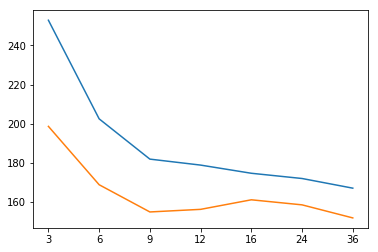

In [6]:
# Plot the error: importance of doing normalization
fig = plt.figure()
plt.plot(err_list[0,:])
plt.plot(err_list[1,:])
plt.xticks(list(range(len(k_nn_list))), k_nn_list)
plt.show()